<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/Ejercicios_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install statsmodels
!pip install wquantiles

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
srate=pd.read_csv("/content/MOCK_DATA.csv")
#Ver los 5 primeros registros
srate.head()
srate.sample(5)
srate.describe()

,year,suicide_rate,population,gdp_per_capita,unemployment_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1996.154000,50.751730,50.258000,51.533000,49.615980
std,15.046551,29.296828,28.641365,30.159418,29.324742
min,1970.000000,0.010000,1.000000,1.000000,0.470000
25%,1983.750000,24.430000,26.750000,26.000000,23.682500
50%,1996.000000,51.155000,51.000000,50.000000,48.880000
75%,2009.000000,77.010000,74.000000,80.000000,74.982500
max,2021.000000,99.910000,100.000000,100.000000,99.900000


In [13]:
srate.columns
srate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        1000 non-null   object 
 1   year                           1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   age_group                      1000 non-null   object 
 4   suicide_rate                   1000 non-null   float64
 5   population                     1000 non-null   int64  
 6   gdp_per_capita                 1000 non-null   int64  
 7   unemployment_rate              1000 non-null   float64
 8   mental_health_services_access  1000 non-null   object 
 9   risk_factors                   1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [28]:
print(srate["suicide_rate"].mean())
print(srate["suicide_rate"].median())
print(trim_mean(srate.suicide_rate,0.1))
print(np.average(srate["suicide_rate"],weights=srate.population))

50.75173
51.155
50.87715
52.03047037287596


<Axes: >

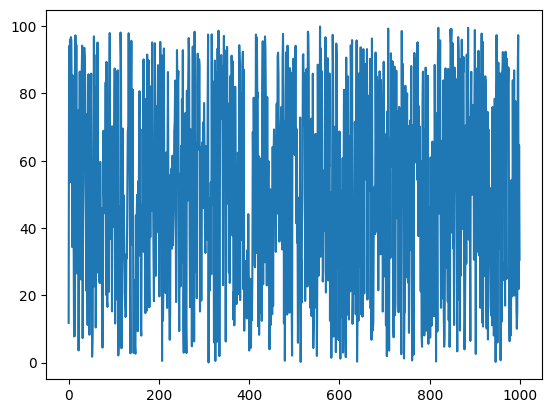

In [29]:
srate["suicide_rate"].plot.line()

<Axes: >

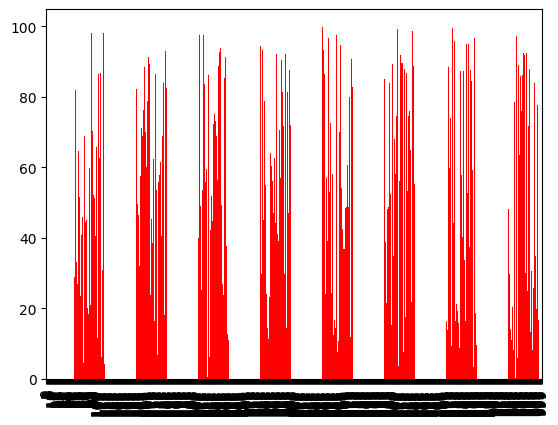

In [30]:
srate["suicide_rate"].plot.bar(color="red")

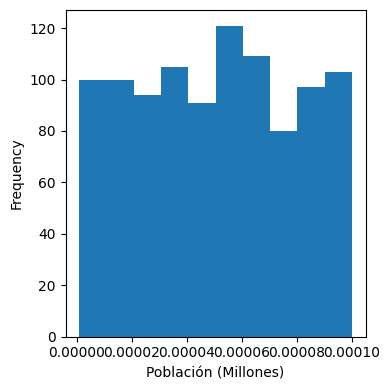

In [31]:
ax=(srate.population/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (Millones)")
plt.tight_layout()
plt.show()

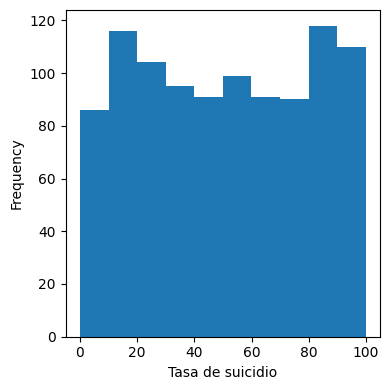

In [32]:
ax=(estado["suicide_rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de suicidio")
plt.tight_layout()
plt.show()

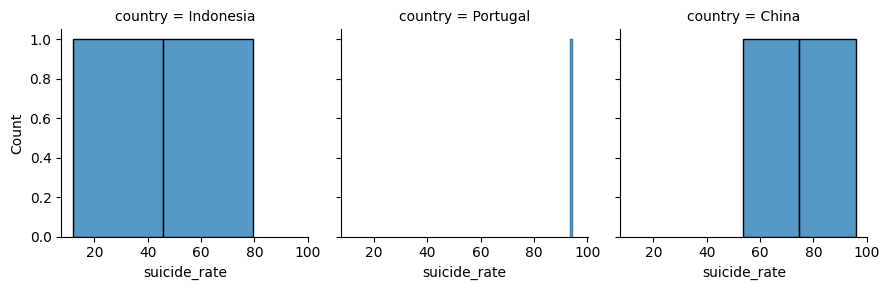

In [33]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="country")
g.map(sns.histplot,"suicide_rate")